<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 11 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Produisez une étude de marché avec Python
</h2>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">1ère partie : Nettoyage des données</h2>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Étape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd

#Importation de la librairie NumPy
import numpy as np

#Importation de ... pyplot de la librairie matplotlib
import matplotlib.pyplot as plt

#Importation de la librairie seaborn
import seaborn as sns

pd.options.mode.copy_on_write = True

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement du fichier de données</h3>
</div>

In [3]:
#Importation du fichier Data_2017_Etude_de_marche.csv
Data_2017 = pd.read_csv('Data_2017_Etude_de_marche.csv', sep = ';')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire et nettoyage des données </h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier </h3>
</div>

In [7]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(Data_2017.shape[0]))
print("Le tableau comporte {} colonne(s)".format(Data_2017.shape[1]))

Le tableau comporte 172 observation(s) ou article(s)
Le tableau comporte 11 colonne(s)


In [9]:
#Afficher le fichier Data_2017 
Data_2017.head(10)

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (Milliers de tonnes),Exportations - Quantité (Milliers de tonnes),Importations - Quantité (Milliers de tonnes),Nourriture (Milliers de tonnes),Production (Milliers de tonnes),Population (Milliers),Stabilite Politique,"PIB par habitant, ($ PPA internationaux constants de 2017)",Croissance PIB
0,Afghanistan,5,57.0,0,29.0,55.0,28.0,36296.113,-2.79,2956.8,1.492959
1,Afrique du Sud,143,2118.0,63,514.0,2035.0,1667.0,57009.756,-0.28,14823.6,17.248839
2,Albanie,85,47.0,0,38.0,47.0,13.0,2884.169,0.37,14229.3,9.831055
3,Algérie,22,277.0,0,2.0,264.0,275.0,41389.189,-0.92,13805.4,4.228057
4,Allemagne,71,1739.0,646,842.0,1609.0,1514.0,82658.409,0.57,61563.6,6.063881
5,Angola,35,319.0,0,277.0,315.0,42.0,29816.766,-0.39,9050.0,16.553488
6,Antigua-et-Barbuda,233,7.0,0,7.0,5.0,0.0,95.426,0.73,26949.1,1.561282
7,Arabie saoudite,151,1435.0,10,722.0,1435.0,616.0,33101.179,-0.65,48554.4,4.917488
8,Argentine,182,1962.0,207,8.0,1856.0,2161.0,43937.140,0.16,28499.0,14.429876
9,Arménie,54,47.0,0,35.0,47.0,11.0,2944.791,-0.63,14880.6,9.838244


In [11]:
#La nature des données dans chacune des colonnes
print("\nRegardons la nature des données dans chacune des colonnes et s'il y a des valeurs manquantes:\n")
Data_2017.info()


Regardons la nature des données dans chacune des colonnes et s'il y a des valeurs manquantes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 11 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Pays                                                        172 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)              172 non-null    int64  
 2   Disponibilité intérieure (Milliers de tonnes)               170 non-null    float64
 3   Exportations - Quantité (Milliers de tonnes)                172 non-null    int64  
 4   Importations - Quantité  (Milliers de tonnes)               170 non-null    float64
 5   Nourriture  (Milliers de tonnes)                            170 non-null    float64
 6   Production (Milliers de tonnes)                             168 non-null    float6

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Harmonisation des colonnes </h3>
</div>

Renommons les colonnes et harmonisons les unités :
 - Milliers de tonnes --> kg
 - Milliers de personnes --> nombre de personnes

In [14]:
#Nous allons harmoniser les unités

#Renommage des colonnes
list_colonne = ["Pays",
                "Disponibilité alimentaire (Kcal/personne/jour)",
                "Disponibilité intérieure (kg)",
                "Exportations - Quantité (kg)",
                "Importations - Quantité (kg)",
                "Nourriture (kg)", 
                "Production (kg)",
                "Population",
                "Stabilite Politique",
                "PIB par habitant",
                "Croissance PIB"
                ]

Data_2017.columns = list_colonne

#Multiplication par 1000 
Data_2017.Population *=1000

#Poids ---> kg
for i in range (2,6) :
    colonne = Data_2017.columns[i]
    Data_2017[colonne] *=pow(10,6)
    
#Affichage du résultat
Data_2017

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Nourriture (kg),Production (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB
0,Afghanistan,5,5.700000e+07,0,29000000.0,5.500000e+07,28.0,36296113.0,-2.79,2956.8,1.492959
1,Afrique du Sud,143,2.118000e+09,63000000,514000000.0,2.035000e+09,1667.0,57009756.0,-0.28,14823.6,17.248839
2,Albanie,85,4.700000e+07,0,38000000.0,4.700000e+07,13.0,2884169.0,0.37,14229.3,9.831055
3,Algérie,22,2.770000e+08,0,2000000.0,2.640000e+08,275.0,41389189.0,-0.92,13805.4,4.228057
4,Allemagne,71,1.739000e+09,646000000,842000000.0,1.609000e+09,1514.0,82658409.0,0.57,61563.6,6.063881
...,...,...,...,...,...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),71,6.260000e+08,0,25000000.0,5.960000e+08,600.0,29402484.0,-1.25,NaN,-13.660969
168,Viet Nam,48,1.206000e+09,1000000,291000000.0,1.166000e+09,918.0,94600648.0,0.21,10405.4,8.380229
169,Yémen,30,2.460000e+08,0,78000000.0,2.370000e+08,168.0,27834819.0,-2.93,NaN,-4.284693
170,Zambie,11,6.000000e+07,1000000,12000000.0,5.800000e+07,49.0,16853599.0,0.14,3642.4,21.908270


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3.1 - Analyse exploratoire de la colonne population </h3>
</div>

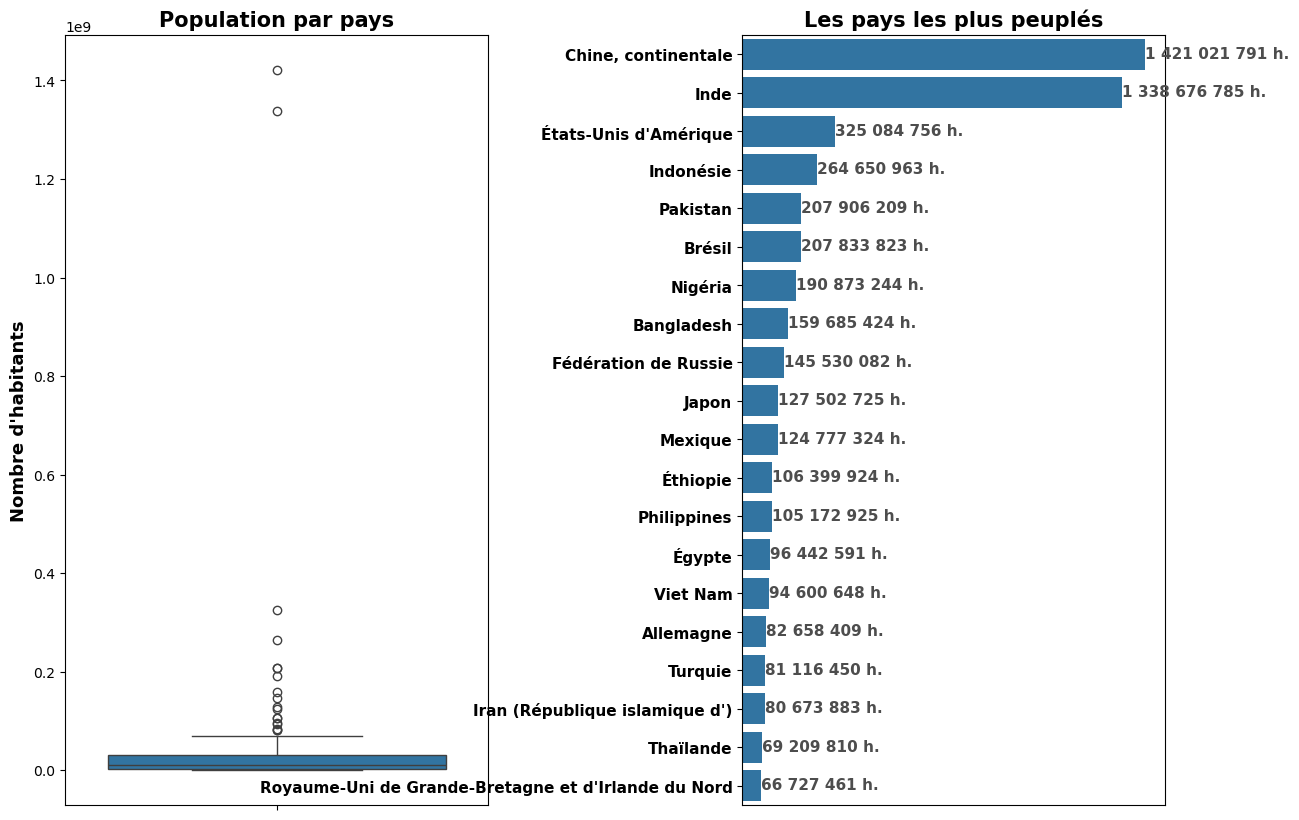

In [17]:
#Création d'une Boite à moustache de la répartition du nb d'habitants
#fig,ax = 
plt.subplots(1,2,figsize=(10, 10))

#Boxplot Population sur la totalité des données
plt.subplot(1,2,1)
plt.title("Population par pays",fontsize =15,fontweight='bold')
plt.ylabel('Nombre d\'habitants',fontweight ='bold',fontsize = 13)
sns.boxplot(data=Data_2017, y='Population')

#Top 20 des pays les plus peuplés
plt.subplot(1,2,2)
df = Data_2017.sort_values("Population",ascending = False).head(20)
sns.barplot(data=df,x ='Population', y='Pays')

plt.title("Les pays les plus peuplés",fontsize =15,fontweight='bold')
plt.xlabel('',)
plt.ylabel('')
plt.xticks([])
plt.yticks(fontsize=11,fontweight='bold')

#Affichage du nb d'habitants pour chaque pays
pct = df["Population"].tolist()
for i in range(20):
    val = "{:,} h.".format(round(pct[i])).replace(","," ")
    plt.text(pct[i]-500,i+0.1,val,fontsize=11,fontweight='bold', c = "0.3")

plt.subplots_adjust(left = 0.1, right = 1.2 ,wspace = 0.6)
plt.show()


On observe la Chine et l'Inde comptent plus d'1 milliard d'habitant chacun, ce sont des pays hors norme

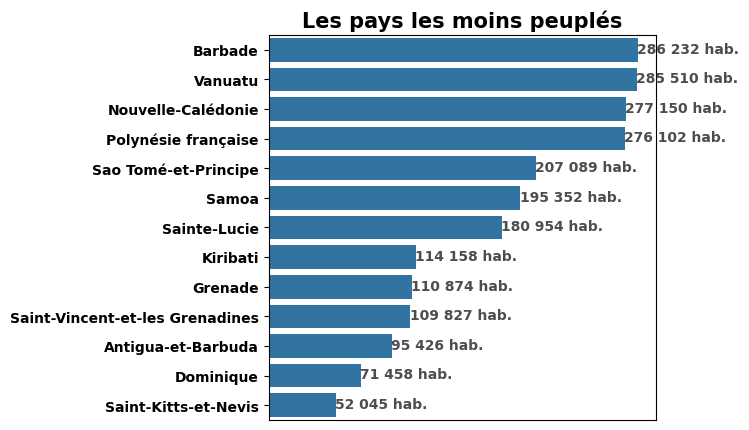

In [19]:
#Les pays les moins peuplés
df = Data_2017.sort_values("Population").head(13).sort_values("Population",ascending = False)

plt.subplots(figsize=(5, 5))

sns.barplot(data=df,x ='Population', y='Pays')

plt.title("Les pays les moins peuplés",fontsize =15,fontweight='bold')
plt.xlabel('',)
plt.ylabel('')
plt.xticks([])
plt.yticks(fontsize=10,fontweight='bold')

#Affichage du nb d'habitants pour chaque pays
pct = df["Population"].tolist()
for i in range(13):
    val = "{:,} hab.".format(round(pct[i])).replace(","," ")
    plt.text(pct[i]-500,i+0.1,val,fontsize=10,fontweight='bold', c = "0.3")

plt.show()

- Ces pays comptent moins de 300 000 habitants
- Ce sont des îles lointaines, impliquant un coût de transport cher pour une faible population
- Ils ont tendance à s'approvisionner auprès du continent le plus proche


In [21]:
#Vérifions que la population des pays édtudiés est supérieure à 60% de la population mondiale
pop_etd = Data_2017.loc[Data_2017["Population"]< 3*pow(10,5),["Population"]].sum()
pop_all = Data_2017["Population"].sum()
pct = pop_etd["Population"]/pop_all

print("\nLa population de ces {} pays représente {:.3%} de la population mondiale\n".format(df.shape[0],pct))
print("\nNous pouvons réduire le nombre de pays à étudier en excluant ces {} pays\n".format(df.shape[0]))

#Nous pouvons donc exclure ces pays
Data_2017 = Data_2017.loc[Data_2017["Population"]> 3*pow(10,5),:]
Data_2017.reset_index(drop = True)


La population de ces 13 pays représente 0.031% de la population mondiale


Nous pouvons réduire le nombre de pays à étudier en excluant ces 13 pays



,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Nourriture (kg),Production (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB
0,Afghanistan,5,5.700000e+07,0,29000000.0,5.500000e+07,28.0,36296113.0,-2.79,2956.8,1.492959
1,Afrique du Sud,143,2.118000e+09,63000000,514000000.0,2.035000e+09,1667.0,57009756.0,-0.28,14823.6,17.248839
2,Albanie,85,4.700000e+07,0,38000000.0,4.700000e+07,13.0,2884169.0,0.37,14229.3,9.831055
3,Algérie,22,2.770000e+08,0,2000000.0,2.640000e+08,275.0,41389189.0,-0.92,13805.4,4.228057
4,Allemagne,71,1.739000e+09,646000000,842000000.0,1.609000e+09,1514.0,82658409.0,0.57,61563.6,6.063881
...,...,...,...,...,...,...,...,...,...,...,...
154,Venezuela (République bolivarienne du),71,6.260000e+08,0,25000000.0,5.960000e+08,600.0,29402484.0,-1.25,NaN,-13.660969
155,Viet Nam,48,1.206000e+09,1000000,291000000.0,1.166000e+09,918.0,94600648.0,0.21,10405.4,8.380229
156,Yémen,30,2.460000e+08,0,78000000.0,2.370000e+08,168.0,27834819.0,-2.93,NaN,-4.284693
157,Zambie,11,6.000000e+07,1000000,12000000.0,5.800000e+07,49.0,16853599.0,0.14,3642.4,21.908270


In [236]:
Data_2017.describe().round()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Nourriture (kg),Production (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB
count,159.0,1.570000e+02,1.590000e+02,1.570000e+02,1.570000e+02,155.0,1.590000e+02,157.0,153.0,159.0
mean,67.0,7.438471e+08,1.130252e+08,9.636306e+07,7.108726e+08,786.0,4.633031e+07,-0.0,24052.0,7.0
std,54.0,2.267328e+09,4.753777e+08,1.926993e+08,2.215197e+09,2596.0,1.587266e+08,1.0,24146.0,7.0
min,0.0,3.000000e+06,-7.000000e+06,0.000000e+00,3.000000e+06,0.0,3.343930e+05,-3.0,1059.0,-29.0
25%,18.0,4.100000e+07,0.000000e+00,3.000000e+06,4.100000e+07,21.0,4.144813e+06,-1.0,5951.0,4.0
50%,61.0,1.280000e+08,2.000000e+06,2.000000e+07,1.230000e+08,91.0,1.064103e+07,-0.0,15201.0,6.0
75%,98.0,4.120000e+08,2.150000e+07,9.700000e+07,4.030000e+08,513.0,3.253048e+07,1.0,34689.0,9.0
max,234.0,1.826600e+10,4.223000e+09,1.069000e+09,1.810000e+10,21914.0,1.421022e+09,2.0,135547.0,32.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3.2 - Analyse exploratoire de la colonne -  Disponibilité alimentaire </h3>
</div>

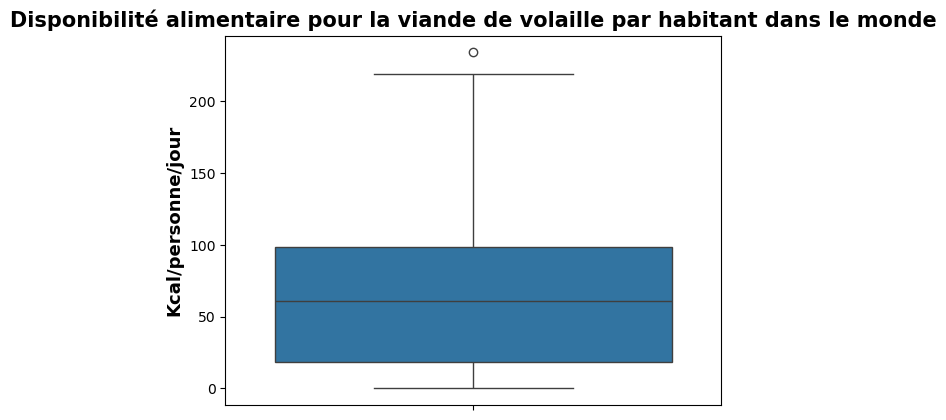

In [24]:
col = "Disponibilité alimentaire (Kcal/personne/jour)"
#Boxplot sur la disponibilité alimentaire
plt.subplot()
plt.title("Disponibilité alimentaire pour la viande de volaille par habitant dans le monde",fontsize =15,fontweight ='bold')
plt.ylabel('Kcal/personne/jour',fontweight ='bold',fontsize = 13)
sns.boxplot(data=Data_2017, y=col)

plt.show()

Regardons quel pays est outlier et ses caractéristiques :

In [26]:
#Regardons quel pays est outlier
Data_2017.loc[Data_2017[col] == Data_2017[col].max()]

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Nourriture (kg),Production (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB
78,Israël,234,636000000.0,3000000,0.0,556000000.0,629.0,8243848.0,-0.89,42936.4,9.287348


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3.3 - Analyse exploratoire de la colonne -  Exportations </h3>
</div>

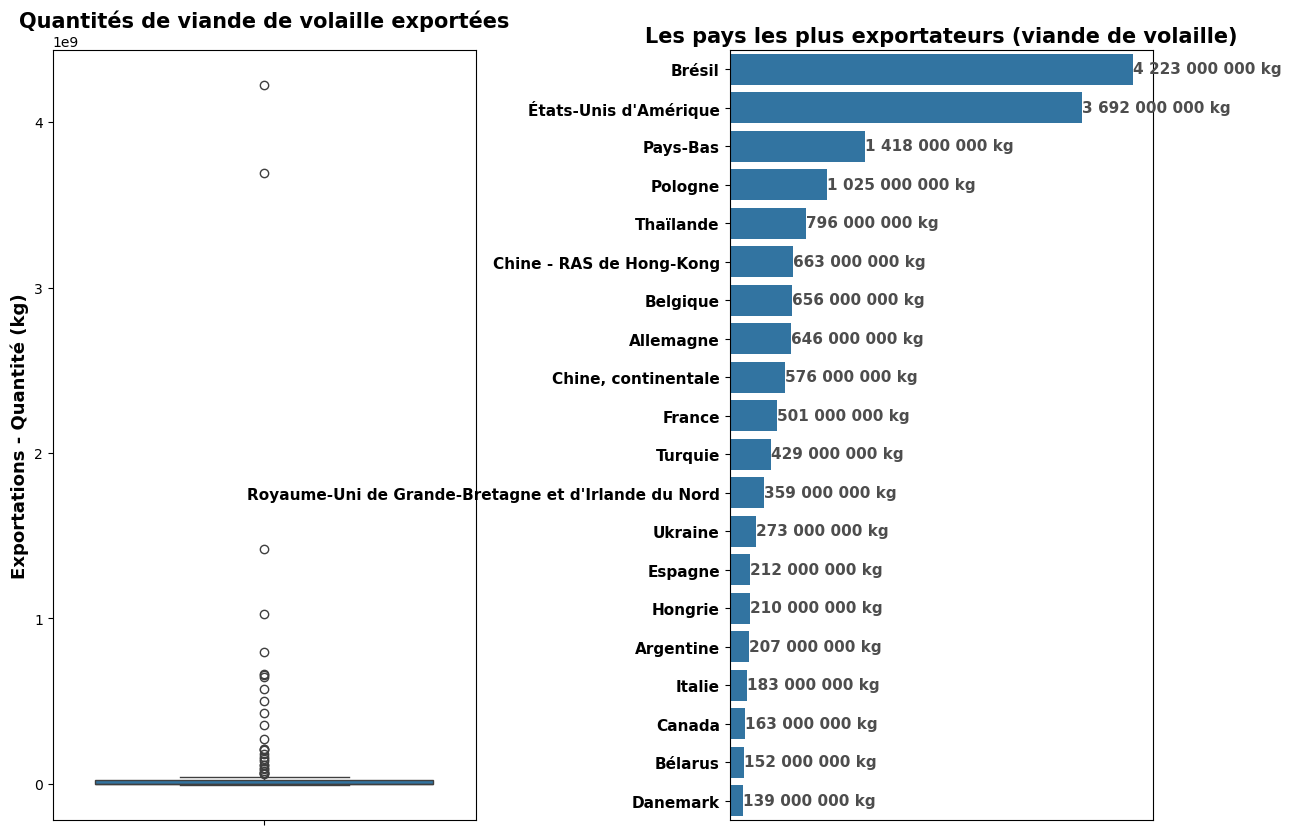

In [29]:
#Création d'une Boite à moustache de la répartition des exportations (kg)
col = 'Exportations - Quantité (kg)'
plt.subplots(1,2,figsize=(10, 10))

#Boxplot Exportation sur la totalité des données
plt.subplot(1,2,1)
plt.title("Quantités de viande de volaille exportées",fontsize =15,fontweight='bold')
plt.ylabel('',fontweight ='bold',fontsize = 13)
sns.boxplot(data=Data_2017, y=col)

#Top 20 des pays les plus exportateurs
plt.subplot(1,2,2)
df = Data_2017.sort_values(col,ascending = False).head(20)
sns.barplot(data=df,x =col, y='Pays')

plt.title("Les pays les plus exportateurs (viande de volaille)",fontsize =15,fontweight='bold')
plt.xlabel('',)
plt.ylabel('')
plt.xticks([])
plt.yticks(fontsize=11,fontweight='bold')

#Affichage du nb d'habitants pour chaque pays
pct = df[col].tolist()
for i in range(20):
    val = "{:,} kg".format(round(pct[i])).replace(","," ")
    plt.text(pct[i]-500,i+0.1,val,fontsize=11,fontweight='bold', c = "0.3")

plt.subplots_adjust(left = 0.1, right = 1.2 ,wspace = 0.6)
plt.show()


On remarque le Brésil et les Etats-Unis comme étant de loin les 2 pays exportant le plus de viande volaille 

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3.4 - Analyse exploratoire de la colonne -  Importations </h3>
</div>

Les pays qui n'importent pas de viande de volaille :

In [33]:
#Les pays les moins importateurs
col = "Importations - Quantité (kg)"
df = Data_2017.loc[Data_2017[col] == 0]
df

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Nourriture (kg),Production (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB
14,Bangladesh,7,2.500000e+08,-1000000,0.0,2.400000e+08,249.0,1.596854e+08,-1.25,6020.3,8.119817
18,Belize,110,1.900000e+07,0,0.0,1.000000e+07,20.0,3.757690e+05,0.03,11523.0,-0.828943
25,Burkina Faso,8,4.600000e+07,0,0.0,4.400000e+07,46.0,1.919323e+07,-0.93,2243.2,6.818791
28,Cameroun,11,8.200000e+07,0,0.0,7.800000e+07,81.0,2.456607e+07,-1.09,4744.0,3.772389
48,Équateur,83,3.410000e+08,0,0.0,3.240000e+08,340.0,1.678536e+07,-0.08,14552.4,2.752312
67,Guyana,165,3.200000e+07,0,0.0,3.000000e+07,31.0,7.752220e+05,-0.05,12889.3,5.344251
72,Inde,7,3.661000e+09,4000000,0.0,2.965000e+09,3545.0,1.338677e+09,-0.77,7363.8,13.253577
78,Israël,234,6.360000e+08,3000000,0.0,5.560000e+08,629.0,8.243848e+06,-0.89,42936.4,9.287348
84,Kenya,2,3.500000e+07,0,0.0,3.400000e+07,35.0,5.022114e+07,-1.13,4871.6,7.291393
95,Madagascar,14,8.200000e+07,-1000000,0.0,7.300000e+07,81.0,2.557051e+07,-0.30,1715.2,8.368606


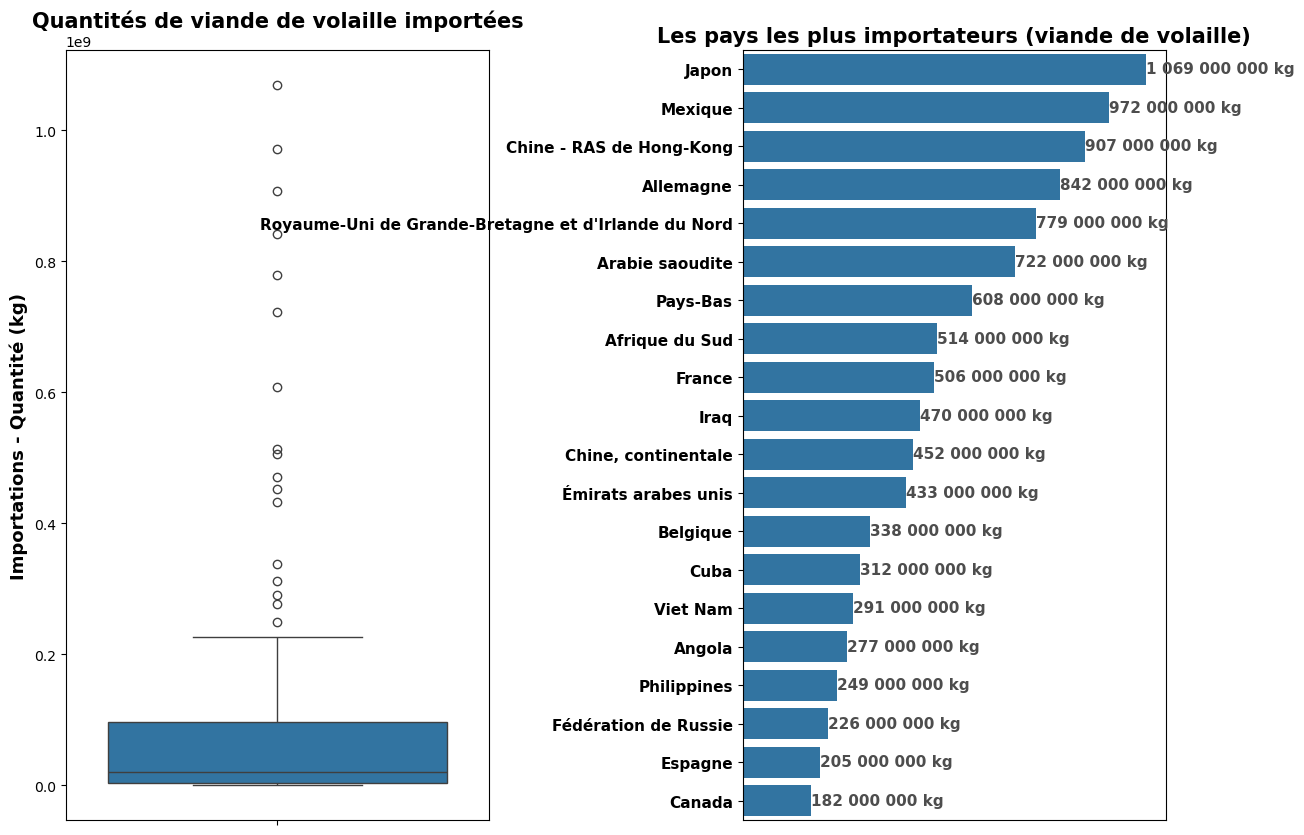

In [35]:
#Les pays les plus importateurs
#Création d'une Boite à moustache de la répartition des importations (kg)
col = "Importations - Quantité (kg)"
plt.subplots(1,2,figsize=(10, 10))

#Boxplot Importation sur la totalité des données
plt.subplot(1,2,1)
plt.title("Quantités de viande de volaille importées",fontsize =15,fontweight='bold')
plt.ylabel('',fontweight ='bold',fontsize = 13)
sns.boxplot(data=Data_2017, y=col)

#Top 20 des pays les plus importateurs
plt.subplot(1,2,2)
df = Data_2017.sort_values(col,ascending = False).head(20)
#sns.despine(left=True)
sns.barplot(data=df,x =col, y='Pays')

plt.title("Les pays les plus importateurs (viande de volaille)",fontsize =15,fontweight='bold')
plt.xlabel('',)
plt.ylabel('')
plt.xticks([])
plt.yticks(fontsize=11,fontweight='bold')

#Affichage du nb d'habitants pour chaque pays
pct = df[col].tolist()
for i in range(20):
    val = "{:,} kg".format(round(pct[i])).replace(","," ")
    plt.text(pct[i]-500,i+0.1,val,fontsize=11,fontweight='bold', c = "0.3")

plt.subplots_adjust(left = 0.1, right = 1.2 ,wspace = 0.6)
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.4 - Analyse et traitement des valeurs manquantes</h3>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.4.0 - Rappel des colonnes concernées</h4>
</div>

In [39]:
Data_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 0 to 171
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Pays                                            159 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)  159 non-null    int64  
 2   Disponibilité intérieure (kg)                   157 non-null    float64
 3   Exportations - Quantité (kg)                    159 non-null    int64  
 4   Importations - Quantité (kg)                    157 non-null    float64
 5   Nourriture (kg)                                 157 non-null    float64
 6   Production (kg)                                 155 non-null    float64
 7   Population                                      159 non-null    float64
 8   Stabilite Politique                             157 non-null    float64
 9   PIB par habitant                                

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.4.1 - Analyse et traitement des valeurs manquantes - Disponibilité intérieure</h4>
</div>

In [42]:
col = 'Disponibilité intérieure (kg)'
Data_2017.loc[Data_2017[col].isna()]

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Nourriture (kg),Production (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB
119,Ouzbékistan,6,NaN,0,NaN,NaN,NaN,31959785.0,-0.24,7157.9,-29.038538
132,République démocratique populaire lao,41,NaN,0,NaN,NaN,NaN,6953035.0,0.39,7453.9,6.361812


Ces pays ont beaucoup de valeurs manquantes, supprimons-les du dataset

In [45]:
#Suppression
Data_2017.drop(index=[119,132],inplace = True)
Data_2017.reset_index(drop = True)

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Nourriture (kg),Production (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB
0,Afghanistan,5,5.700000e+07,0,29000000.0,5.500000e+07,28.0,36296113.0,-2.79,2956.8,1.492959
1,Afrique du Sud,143,2.118000e+09,63000000,514000000.0,2.035000e+09,1667.0,57009756.0,-0.28,14823.6,17.248839
2,Albanie,85,4.700000e+07,0,38000000.0,4.700000e+07,13.0,2884169.0,0.37,14229.3,9.831055
3,Algérie,22,2.770000e+08,0,2000000.0,2.640000e+08,275.0,41389189.0,-0.92,13805.4,4.228057
4,Allemagne,71,1.739000e+09,646000000,842000000.0,1.609000e+09,1514.0,82658409.0,0.57,61563.6,6.063881
...,...,...,...,...,...,...,...,...,...,...,...
152,Venezuela (République bolivarienne du),71,6.260000e+08,0,25000000.0,5.960000e+08,600.0,29402484.0,-1.25,NaN,-13.660969
153,Viet Nam,48,1.206000e+09,1000000,291000000.0,1.166000e+09,918.0,94600648.0,0.21,10405.4,8.380229
154,Yémen,30,2.460000e+08,0,78000000.0,2.370000e+08,168.0,27834819.0,-2.93,NaN,-4.284693
155,Zambie,11,6.000000e+07,1000000,12000000.0,5.800000e+07,49.0,16853599.0,0.14,3642.4,21.908270


<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.4.2 - Analyse et traitement des valeurs manquantes - PIB par habitant </h4>
</div>

In [48]:
#Regardons les valeurs manquantes
Data_2017.loc[Data_2017["PIB par habitant"].isna()]

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Nourriture (kg),Production (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB
34,"Chine, Taiwan Province de",126,785000000.0,8000000,161000000.0,785000000.0,652.0,23674546.0,NaN,NaN,8.937468
41,Cuba,82,342000000.0,-2000000,312000000.0,269000000.0,29.0,11339254.0,0.64,NaN,6.051113
134,République populaire démocratique de Corée,8,43000000.0,0,0.0,41000000.0,43.0,25429825.0,-0.50,NaN,2.932826
162,Turkménistan,15,27000000.0,4000000,9000000.0,26000000.0,20.0,5757667.0,-0.13,NaN,9.332512
167,Venezuela (République bolivarienne du),71,626000000.0,0,25000000.0,596000000.0,600.0,29402484.0,-1.25,NaN,-13.660969
169,Yémen,30,246000000.0,0,78000000.0,237000000.0,168.0,27834819.0,-2.93,NaN,-4.284693


In [50]:
print("Cuba : PIB/habitants en 2017 : 8543$  (Source : Banque Mondiale)\n",
      "https://donnees.banquemondiale.org/indicateur/NY.GDP.PCAP.CD?end=2020&locations=CU&start=1970&view=chart\n")

print("Taiwan : PIB/habitants en 2017 : 25061$  (Source : Statista)\n",
      "https://fr.statista.com/statistiques/1310481/taiwan-pib-habitant/#:~:text=En%202020%2C%20le%20PIB%20par,de%2045.000%20dollars%20en%202026.\n")
Data_2017.loc[Data_2017["Pays"] == "Cuba","PIB par habitant"] = 8543
Data_2017.loc[Data_2017["Pays"] == "Chine, Taiwan Province de","PIB par habitant"] = 25061

#Suppression
print("Supprimons les autres pays ayant un indice de stabilité politique inférieur à 0\n")
Data_2017.drop(index=[134,162,167,169],inplace = True)
Data_2017.reset_index(drop = True)

Cuba : PIB/habitants en 2017 : 8543$  (Source : Banque Mondiale)
 https://donnees.banquemondiale.org/indicateur/NY.GDP.PCAP.CD?end=2020&locations=CU&start=1970&view=chart

Taiwan : PIB/habitants en 2017 : 25061$  (Source : Statista)
 https://fr.statista.com/statistiques/1310481/taiwan-pib-habitant/#:~:text=En%202020%2C%20le%20PIB%20par,de%2045.000%20dollars%20en%202026.

Supprimons les autres pays ayant un indice de stabilité politique inférieur à 0



,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Nourriture (kg),Production (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB
0,Afghanistan,5,5.700000e+07,0,29000000.0,5.500000e+07,28.0,36296113.0,-2.79,2956.8,1.492959
1,Afrique du Sud,143,2.118000e+09,63000000,514000000.0,2.035000e+09,1667.0,57009756.0,-0.28,14823.6,17.248839
2,Albanie,85,4.700000e+07,0,38000000.0,4.700000e+07,13.0,2884169.0,0.37,14229.3,9.831055
3,Algérie,22,2.770000e+08,0,2000000.0,2.640000e+08,275.0,41389189.0,-0.92,13805.4,4.228057
4,Allemagne,71,1.739000e+09,646000000,842000000.0,1.609000e+09,1514.0,82658409.0,0.57,61563.6,6.063881
...,...,...,...,...,...,...,...,...,...,...,...
148,Ukraine,78,1.009000e+09,273000000,121000000.0,1.006000e+09,1211.0,44487709.0,-1.87,16523.5,20.542019
149,Uruguay,33,3.300000e+07,3000000,3000000.0,3.100000e+07,33.0,3436641.0,1.04,29662.1,12.813067
150,Viet Nam,48,1.206000e+09,1000000,291000000.0,1.166000e+09,918.0,94600648.0,0.21,10405.4,8.380229
151,Zambie,11,6.000000e+07,1000000,12000000.0,5.800000e+07,49.0,16853599.0,0.14,3642.4,21.908270


<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.4.3 - Analyse et traitement des valeurs manquantes - Stabilité politique </h4>
</div>

In [53]:
#Regardons les valeurs manquantes
Data_2017.loc[Data_2017["Stabilite Politique"].isna()]

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Nourriture (kg),Production (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB
33,"Chine, continentale",59,1.816100e+10,576000000,452000000.0,1.751800e+10,18236.0,1.421022e+09,NaN,16461.1,8.937468
34,"Chine, Taiwan Province de",126,7.850000e+08,8000000,161000000.0,7.850000e+08,652.0,2.367455e+07,NaN,25061.0,8.937468


Considérons ces valeurs comme nulles, 

In [56]:
Data_2017.loc[Data_2017["Pays"] == "Chine, continentale","Stabilite Politique"] = 0
Data_2017.loc[Data_2017["Pays"] == "Chine, Taiwan Province de","Stabilite Politique"] = 0

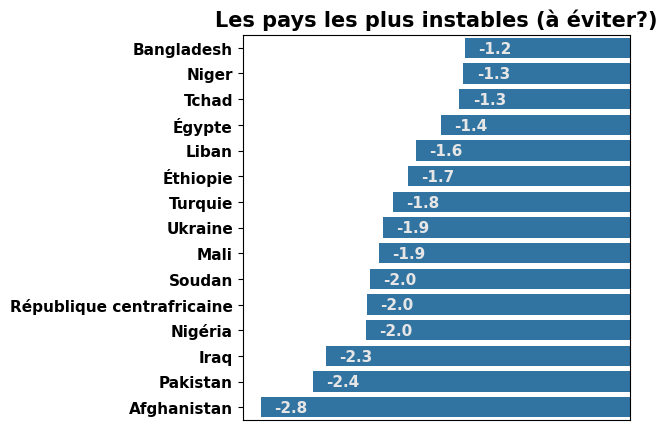

In [58]:
#Pays les plus instables (à éviter?)
df = Data_2017.sort_values("Stabilite Politique").head(15).sort_values("Stabilite Politique",ascending = False)

plt.subplots(figsize=(5, 5))

sns.barplot(data=df,x ='Stabilite Politique', y='Pays')

plt.title("Les pays les plus instables (à éviter?)",fontsize =15,fontweight='bold')
plt.xlabel('',)
plt.ylabel('')
plt.xticks([])
plt.yticks(fontsize=11,fontweight='bold')

#Affichage du nb d'habitants pour chaque pays
pct = df["Stabilite Politique"].tolist()
for i in range(15):
    val = "{:.2}".format(pct[i])
    plt.text(pct[i]+0.1,i+0.2,val,fontsize=11,fontweight='bold', c = "0.9")

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.4.4 - Analyse et traitement des valeurs manquantes - Variabilité dispo alimentaire et Production </h4>
</div>

In [61]:
Data_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 0 to 171
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Pays                                            153 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)  153 non-null    int64  
 2   Disponibilité intérieure (kg)                   153 non-null    float64
 3   Exportations - Quantité (kg)                    153 non-null    int64  
 4   Importations - Quantité (kg)                    153 non-null    float64
 5   Nourriture (kg)                                 153 non-null    float64
 6   Production (kg)                                 151 non-null    float64
 7   Population                                      153 non-null    float64
 8   Stabilite Politique                             153 non-null    float64
 9   PIB par habitant                                

Il reste des valeurs manquantes dans les colonnes Variabilité dispo alimentaire et Production, remplaçons-les par des valeurs nulles

In [64]:
#Il reste des valeurs manquantes, remplaçons-les par des valeurs nulles
Data_2017 = Data_2017.fillna(0)

In [66]:
print("\nIl y a {} pays pour lesquels les données sont complètes\n".format(Data_2017.shape[0]))


Il y a 153 pays pour lesquels les données sont complètes



<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Enregistrement des données dans un fichier </h2>
</div>

In [69]:
Data_2017.to_csv("Data_2017.csv",index = False)